In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def gaussian(n: np.ndarray, mu: np.ndarray, sigma: float, use_log: bool):
    N = n.shape[1]

    scale = ((N - 1.) / 2.) / np.log((N + 1) / 2.) if use_log else 1.

    def log(x):
        return np.log(x) if use_log else x - 1

    result = np.zeros((N, N))
    for l1 in [-N, 0, N]:
        for l2 in [-N, 0, N]:
            norm = np.linalg.norm(n + np.array([l1, l2]).reshape(-1, 1, 1), axis=0)
            result += np.exp(
                -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)
                / sigma)
    return result

In [11]:
N = 101
n1 = np.arange(N).reshape((-1, 1)).repeat(N, axis=1) - (N - 1) / 2
n2 = n1.T
n = np.array([n1, n2])

sigma = 100.

/var/folders/rm/3d0_pm1j4d7dxnhy7q6160tr0000gn/T/ipykernel_20068/3487998290.py:14: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


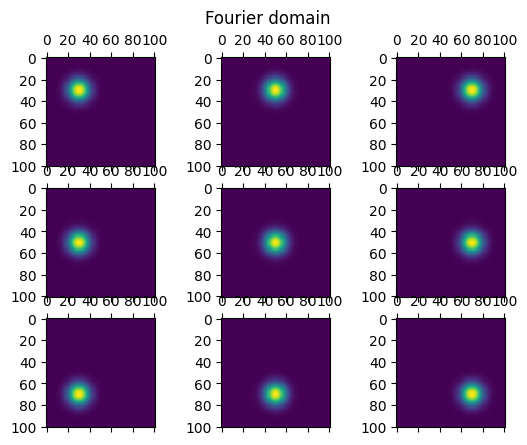

In [34]:
#plt.matshow(n1)

fig, axes = plt.subplots(3, 3)
fig.suptitle("Fourier domain")
axes[0, 0].matshow(gaussian(n, np.array([-20., -20.]), sigma, False))
axes[0, 1].matshow(gaussian(n, np.array([-20., 0.]), sigma, False))
axes[0, 2].matshow(gaussian(n, np.array([-20., 20.]), sigma, False))

axes[1, 0].matshow(gaussian(n, np.array([0., -20.]), sigma, False))
axes[1, 1].matshow(gaussian(n, np.array([0., 0.]), sigma, False))
axes[1, 2].matshow(gaussian(n, np.array([0., 20.]), sigma, False))

axes[2, 0].matshow(gaussian(n, np.array([20., -20.]), sigma, False))
axes[2, 1].matshow(gaussian(n, np.array([20., 0.]), sigma, False))
axes[2, 2].matshow(gaussian(n, np.array([20., 20.]), sigma, False))

/var/folders/rm/3d0_pm1j4d7dxnhy7q6160tr0000gn/T/ipykernel_20068/3487998290.py:14: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


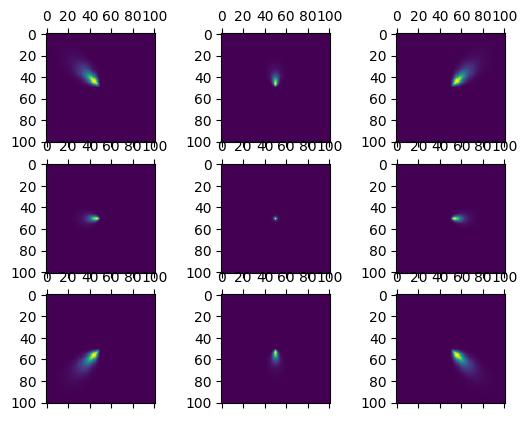

In [35]:
fig, axes = plt.subplots(3, 3)
axes[0, 0].matshow(gaussian(n, np.array([-20., -20.]), sigma, True))
axes[0, 1].matshow(gaussian(n, np.array([-20., 0.]), sigma, True))
axes[0, 2].matshow(gaussian(n, np.array([-20., 20.]), sigma, True))

axes[1, 0].matshow(gaussian(n, np.array([0., -20.]), sigma, True))
axes[1, 1].matshow(gaussian(n, np.array([0., 0.]), sigma, True))
axes[1, 2].matshow(gaussian(n, np.array([0., 20.]), sigma, True))

axes[2, 0].matshow(gaussian(n, np.array([20., -20.]), sigma, True))
axes[2, 1].matshow(gaussian(n, np.array([20., 0.]), sigma, True))
axes[2, 2].matshow(gaussian(n, np.array([20., 20.]), sigma, True))

In [37]:
def ft(y_pos, x_pos):
    frequency_domain = gaussian(n, np.array([y_pos, x_pos]), sigma, True)
    spatial_domain = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(frequency_domain)))
    return spatial_domain.real, spatial_domain.imag

/var/folders/rm/3d0_pm1j4d7dxnhy7q6160tr0000gn/T/ipykernel_20068/3487998290.py:14: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


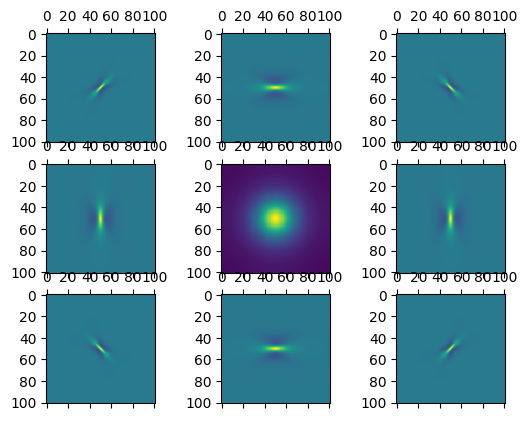

In [41]:
fig, axes = plt.subplots(3, 3)

args =[*ft(-20., -20.)]
axes[0, 0].matshow(args[0], vmin=np.min(args), vmax=np.max(args))
args =[*ft(-20., 0.)]
axes[0, 1].matshow(args[0], vmin=np.min(args), vmax=np.max(args))
args =[*ft(-20., 20.)]
axes[0, 2].matshow(args[0], vmin=np.min(args), vmax=np.max(args))

args =[*ft(0., -20.)]
axes[1, 0].matshow(args[0], vmin=np.min(args), vmax=np.max(args))
args =[*ft(0., 0.)]
axes[1, 1].matshow(args[0], vmin=np.min(args), vmax=np.max(args))
args =[*ft(0., 20.)]
axes[1, 2].matshow(args[0], vmin=np.min(args), vmax=np.max(args))

args =[*ft(20., -20.)]
axes[2, 0].matshow(args[0], vmin=np.min(args), vmax=np.max(args))
args =[*ft(20., 0.)]
axes[2, 1].matshow(args[0], vmin=np.min(args), vmax=np.max(args))
args =[*ft(20., 20.)]
axes[2, 2].matshow(args[0], vmin=np.min(args), vmax=np.max(args))

In [61]:
import mnist
import pylab as plt

In [47]:
def display_image(image):
    plt.imshow(image)

In [50]:
imgs = mnist.train_images()/255.0

imgs.shape

(60000, 28, 28)

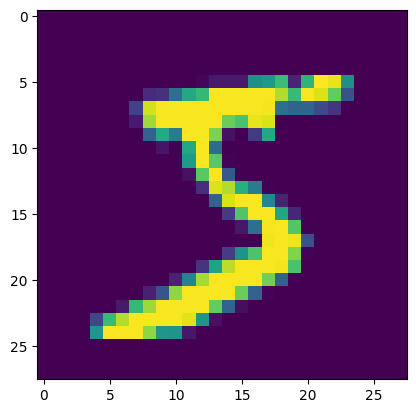

In [51]:
display_image(imgs[0])

/var/folders/rm/3d0_pm1j4d7dxnhy7q6160tr0000gn/T/ipykernel_20068/3487998290.py:14: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


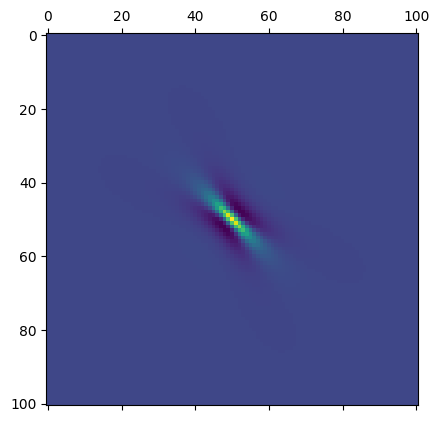

In [60]:
args =[*ft(-20., 20.)]
plt.matshow(args[0])

In [62]:
from scipy.interpolate import RegularGridInterpolator

def regrid(data, out_x, out_y):
    m = max(data.shape[0], data.shape[1])
    y = np.linspace(0, 1.0/m, data.shape[0])
    x = np.linspace(0, 1.0/m, data.shape[1])
    interpolating_function = RegularGridInterpolator((y, x), data)

    yv, xv = np.meshgrid(np.linspace(0, 1.0/m, out_y), np.linspace(0, 1.0/m, out_x))

    return interpolating_function((xv, yv))

In [67]:
out = regrid(args[0], 28, 28)

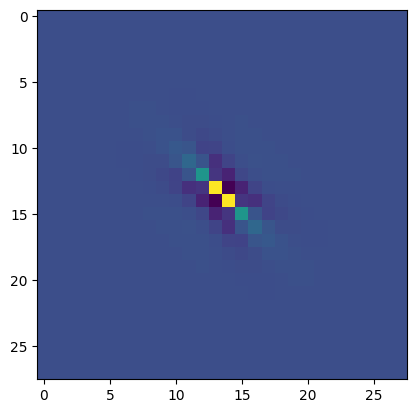

In [68]:
plt.imshow(out)

-0.003265435858479452 0.005844657697165559
-0.6116502567227158 0.6366951731673873


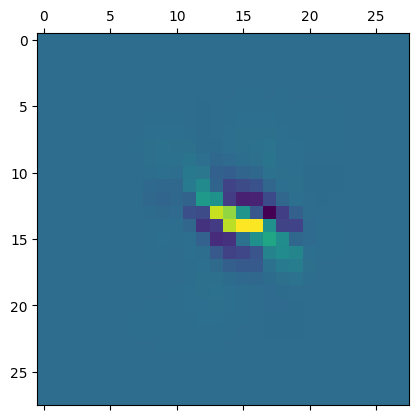

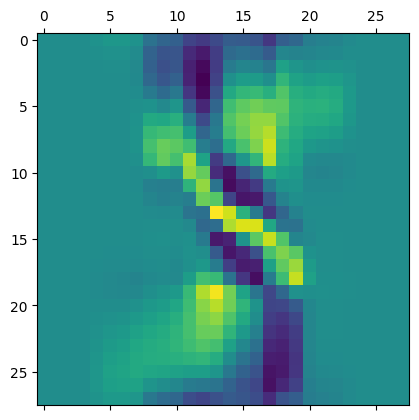

In [74]:
from sklearn.preprocessing import normalize

dot_prod = np.dot(out, imgs[0])
plt.matshow(dot_prod)
print(np.min(dot_prod), np.max(dot_prod))
norm_dot_prod = normalize(dot_prod)
print(np.min(norm_dot_prod), np.max(norm_dot_prod))
plt.matshow(norm_dot_prod)

/var/folders/rm/3d0_pm1j4d7dxnhy7q6160tr0000gn/T/ipykernel_20068/3487998290.py:14: RuntimeWarning: invalid value encountered in divide
  -np.square(scale * np.where(norm > 0, (n + np.array([l1, l2]).reshape(-1, 1, 1)) / norm * log(norm + 1), 0.) - mu.reshape(-1, 1, 1)).sum(axis=0)


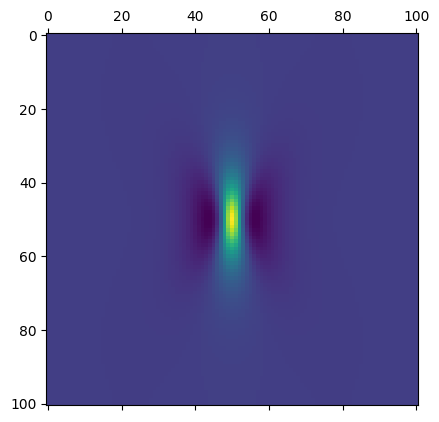

In [76]:
args =[*ft(0., 20.)]
plt.matshow(args[0])
out = regrid(args[0], 28, 28)

-0.0015034362830059372 0.0029973252239811404
-0.48946497260558003 0.606267412026879


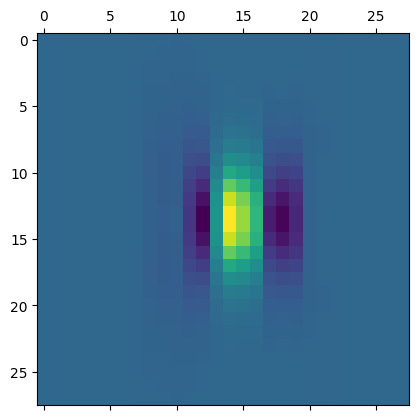

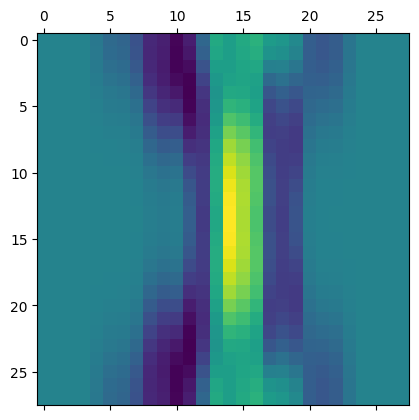

In [77]:
dot_prod = np.dot(out, imgs[0])
plt.matshow(dot_prod)
print(np.min(dot_prod), np.max(dot_prod))
norm_dot_prod = normalize(dot_prod)
print(np.min(norm_dot_prod), np.max(norm_dot_prod))
plt.matshow(norm_dot_prod)

In [79]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2':"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [82]:
angles = angle_between(out, imgs[0])
angles.shape

(28, 28)

In [ ]:
np.linalg.norm()

In [90]:
## cos(theta) = (a * b)/(||a||_2 ||b||_2 )

def normalized_dot(a, b):
    return np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b)))

In [91]:
normalized_dot(out, imgs[0])

0.06477877248080449

In [125]:
N = 28
n1 = np.arange(N).reshape((-1, 1)).repeat(N, axis=1) - (N - 1) / 2
n2 = n1.T
n = np.array([n1, n2])

sigma = 5.

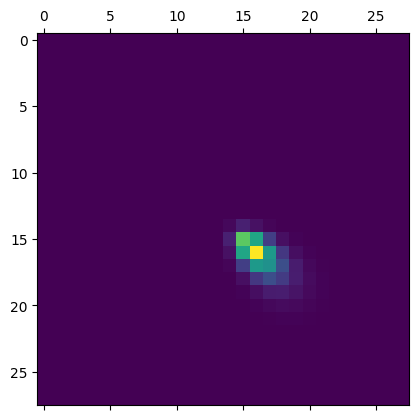

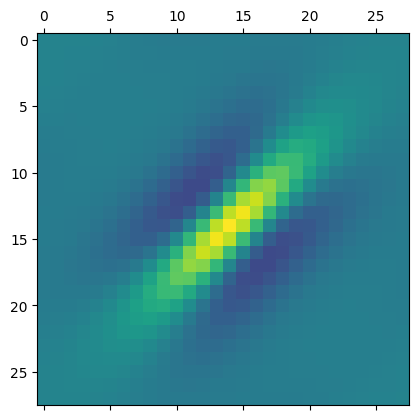

In [130]:
plt.matshow(gaussian(n, np.array([5., 5.]), sigma, True))
args_45 =[*ft(5., 5.)]
plt.matshow(args_45[0], vmin=np.min(args_45), vmax=np.max(args_45))

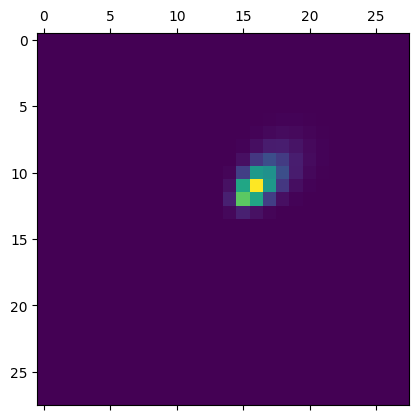

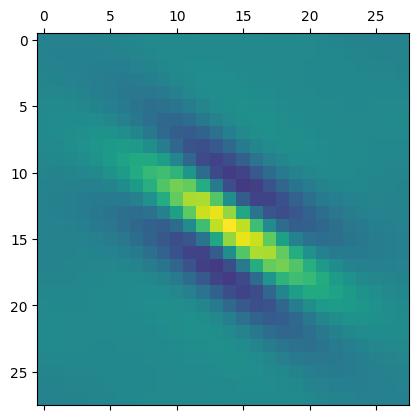

In [131]:
plt.matshow(gaussian(n, np.array([-5., 5.]), sigma, True))
args_315 =[*ft(-5., 5.)]
plt.matshow(args_315[0], vmin=np.min(args_315), vmax=np.max(args_315))

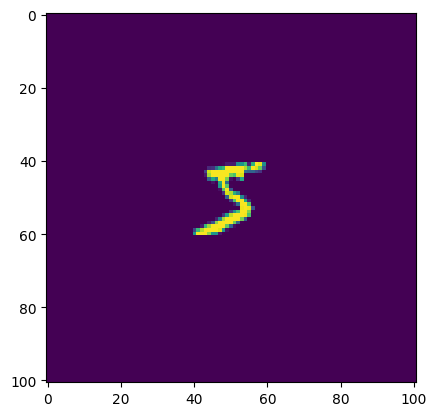

In [132]:
expanded_matrix = np.zeros((101, 101))
expanded_matrix[36:64, 36:64] = imgs[0]
plt.imshow(expanded_matrix)